# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
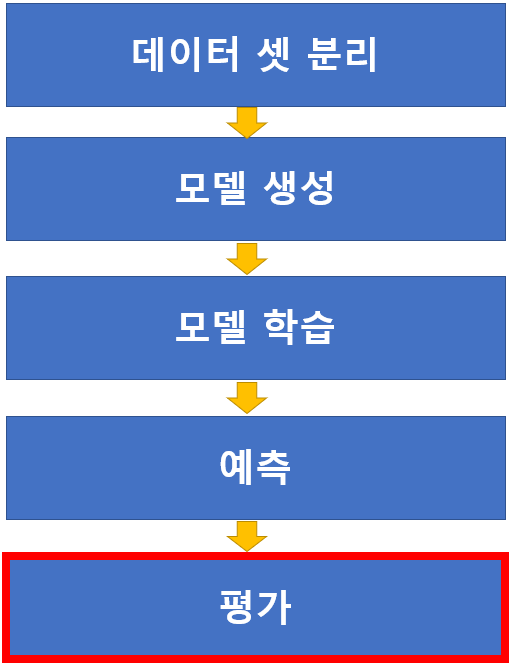

# 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

# 분류(Classification) 평가 지표

##  이진 분류(Binary classification)의 양성(Positive)과 음성(Negative)
- 양성(Positive): 모델이 찾으려는(추론하려는) 주 대상
- 음성(Negative): 모델이 찾으려는(추론하려는) 주 대상이 아닌 것
- 예
    - 환자 분류 
        - 양성 - 환자, 음성 - 정상인
    - 스팸메일 분류 
        - 양성 - 스팸메일, 음성 - 정상메일
    - 금융사기 모델
        - 양성 - 사기거래, 음성 - 정상거래
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 이진 분류에서 **양성(Positive)에 대한 지표만 확인 할 수 없다.** 
- 불균형 데이터의 경우 accuracy가 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

In [1]:
# 불균형 data set을 강제로 만들어 보자. 그리고 accuracy의 문제점을 직접 확인해보자.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 - data의 양을 줄였다.
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [4]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [5]:
# image가 컴퓨터 상에 저장될 때 pixel당 숫자를 부여해 저장한다. 이 숫자는 색에 대한 정보를 담고 있다.
# 컬러 image는 3차원 배열로 만들어진다. R, G, B 각각에 대한 정보를 담고 있는 2차원 배열이 3개 있는 것이다.
# 흑백 image는 단순히 회색조에 대한 숫자만을 값으로 가진다. 회색조에 대한 정보를 담고 있는 2차원 배열이 하나만 있다.
# scikit-learn에서 mnist data set을 8(heigth) * 8(width) 짜리로 저장했다. 즉 pixel이 64개 있는 것이다.
# 위의 featrue_names는 각 pixel의 위치를 알려준다.

In [6]:
# y(target) 값의 구성 분포를 확인해보자.
np.unique(y, return_counts  = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [7]:
# y 값을 확인해보니 이 문제는 0 ~ 9의 값 중 하나를 정해야 하는 multi-class classfication 문제라는 것을 알 수 있다.

In [8]:
# X의 값 구성을 확인해보자.
np.min(X), np.max(X)

(0.0, 16.0)

In [9]:
# mnist data는 흑백 image이다. 그래서 X 값은 검은색의 농도를 알려준다. 농도가 0 ~ 16으로 구성되어 있는 것이다.
# 0은 검은색이고 16은 흰색이다.

In [10]:
# 하나의 image는 2차원 배열이다. 그리고 이 2차원 배열이 fallten된 것이 X의 하나의 row에 들어가 있다.
# 그리고 y에는 이 정보가 의미하는 숫자가 무엇인지 숫자로 들어가 있다.

# 하나의 row에 담겨 있는 image 정보를 (8, 8)로 reshape하면 이 배열이 어떤 숫자인지 보일 것이다.

print(y[0])
X[0].reshape(8, 8)

0


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
# 위 배열을 보면 해당 image가 0이라는 것을 알 수 있다.
# 잘 모르겠으면 숫자가 있는 부분을 한 칸씩 색칠해보길 바란다.
# 이걸 정확한 image로 출력해보자. 이때 matplotlib.pyplot을 이용한다.

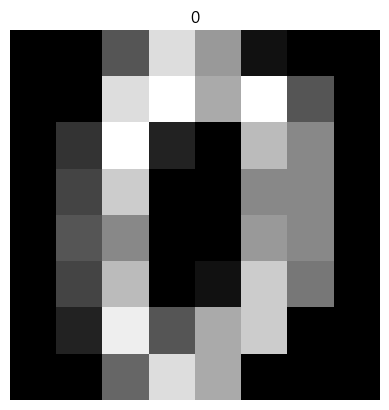

In [12]:
img_index = 0

img = X[img_index].reshape(8, 8)
plt.imshow(img, cmap = 'gray')

plt.title(y[img_index])
plt.axis('off')

plt.show()

In [13]:
# 28 * 28 image를 8 * 8 image로 바꿨기 때문에 image가 많이 깨져 보이긴 하지만 숫자의 형태를 알 수 있다.

# 이런 data를 이용해 model을 학습시키면 어떻게 될까?
# X에 저장되어 있는 image pixel 정보를 이용해 패턴을 파악해 해당 image가 의미하는 숫자를 알려줄 것이다.
# 원래 image는 Deep Learning을 통해 분석하는 것이 더 정확하지만
# mnist data set처럼 image를 숫자로 저장해 놓은 것은 Machine Learning을 통해서도 분석이 가능하다.

# mnist data set은 multi-class classification 문제이다.
# 하지만 이것을 binary classifiaction 문제로 바꿔보자.
# image가 9인지 아닌지를 파악해보자.

### 불균형 데이터셋으로 만들기
이미지를 0 ~ 9 로 분류하는 문제를 위한 데이터셋 ===> 9와 나머지 숫자로 분류하는 데이터셋으로 변환 => 이 숫자가 9야?
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [14]:
# binary classification으로 바꾹기 위해 y의 값 중 9인 것을 1로 그 외의 것을 0으로 바꿔보자.
y = np.where(y == 9, 1, 0)

In [15]:
np.unique(y, return_counts = True)

(array([0, 1]), array([1617,  180], dtype=int64))

In [16]:
np.unique(y, return_counts = True)[1] / y.size

array([0.89983306, 0.10016694])

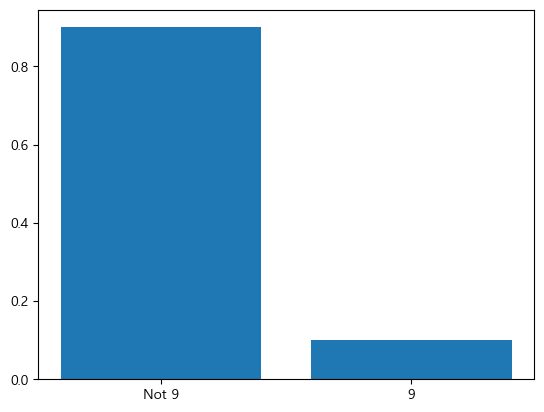

In [17]:
r = np.unique(y, return_counts = True)[1] / y.size

plt.bar([0, 1], r)
plt.xticks([0, 1], ['Not 9', '9'])
plt.show()

### 데이터셋 분할
- train/test 로 분할

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

### 모델 생성 및 학습

#### Dummy Model 정의
- dummy model: 진짜 모델이 아니라 모델을 흉내낸 모델을 말한다.
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [20]:
dummy_model = DummyClassifier(strategy = 'most_frequent')
dummy_model.fit(X_train, y_train)

# 정확도 검증
pred_train = dummy_model.predict(X_train)
pred_test = dummy_model.predict(X_test)

print(f'train data set에 대한 정확도: {round(accuracy_score(y_train, pred_train) * 100, 3)} %')
print(f'test data set에 대한 정확도: {round(accuracy_score(y_test, pred_test) * 100, 3)} %')

train data set에 대한 정확도: 89.978 %
test data set에 대한 정확도: 90.0 %


아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

In [21]:
# positive 예측력 평가지표를 배우기 전에 confusion matrix에 대해 이해하자.
# confusion matrix를 이해하지 못하면 positive 예측력 평기지표를 이해하기 힘들 것이다.
# confusion matrix를 기반으로 해서 평가지표를 만들기 때문이다.

In [22]:
# binary calssification에서...

In [23]:
# 아래 confusion matrix에서 숫자만 보고 model이 어떻게 예측했고 어떻게 맞았고 틀렸는지를 잘 알고 있어야 한다.
# 꾸준히 연습하자.

## 혼동 행렬(Confusion Matrix)
- tool과 표현 방법에 따라 모양은 달라진다. 우리는 scikit-learn의 표현 방식을 기준으로 confusion matrix에 대해 배워보자.
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

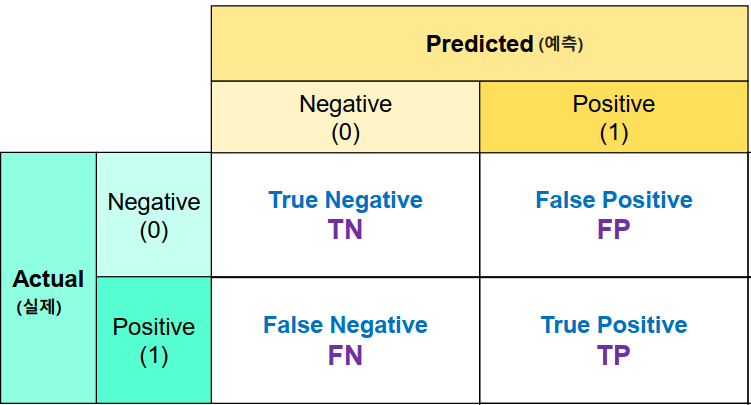

- **TP(True Positive)** 
    - model이 positive라고 예측했는데 맞은 개수
- **TN(True Negative)** 
    - model이 negative라고 예측했는데 맞은 개수
- **FP(False Positive)** 
    - model이 positive라고 예측했는데 틀린 개수 
    - model이 negative를 positive로 예측한 것이다.
- **FN(False Negative)** 
    - model이 negative라고 예측했는데 틀린 개수 
    - model이 positive를 negative로 예측한 것이다.

- 예)
```python
[[20, 6],
 [4,  40]]
```
TN이 20개 FP가 6개, FN이 4개, TP가 40개 있다는 뜻이다.

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

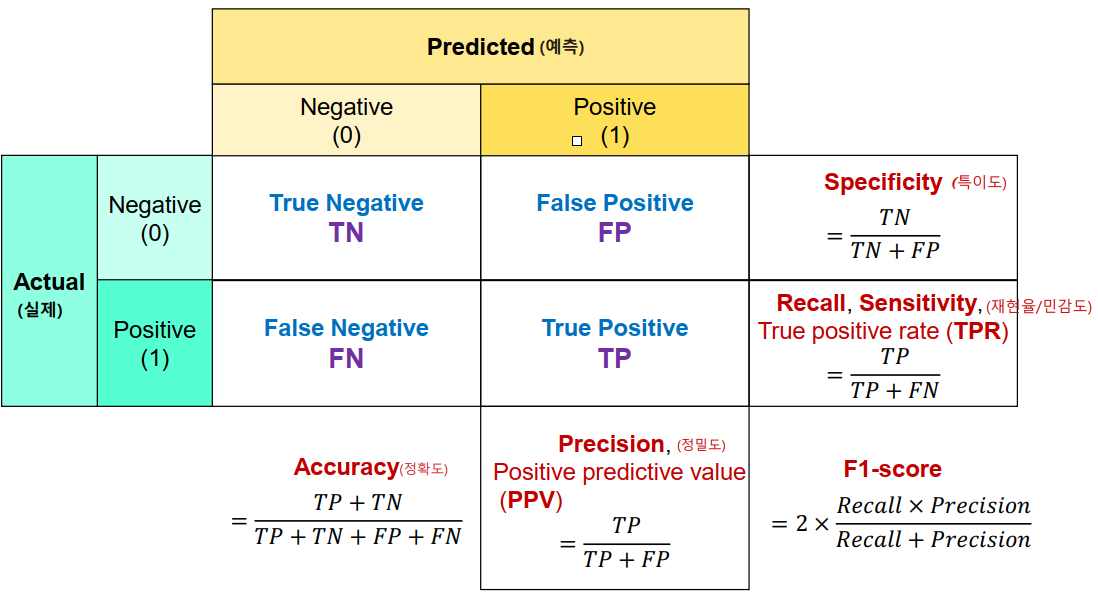

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix를 시각화해주는 클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score

In [25]:
# accuracy 확인
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.8997772828507795
0.9


In [26]:
print('train data set에 대한 Confusion Matrix')
print(confusion_matrix(y_train, pred_train))
print('test data set에 대한 Confusion Matrix')
print(confusion_matrix(y_test, pred_test))

train data set에 대한 Confusion Matrix
[[1212    0]
 [ 135    0]]
test data set에 대한 Confusion Matrix
[[405   0]
 [ 45   0]]


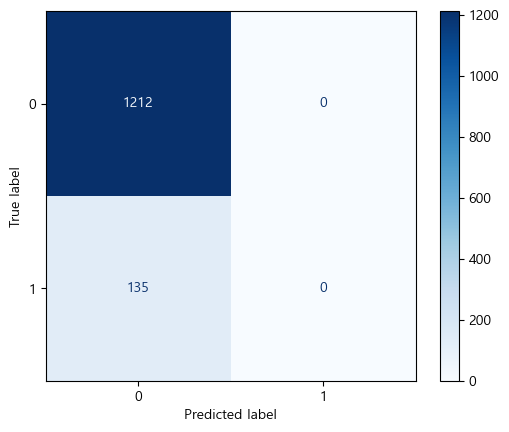

In [27]:
# confusion matrix의 visualization
# ConfusionMatrixDisplay instance를 생성할 때 confusion matrix를 입력해 instance를 생성한다.
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, pred_train))

# ConfusionMatrixDisplay instance를 바로 plot으로 그릴 수 있다. 이때 parameter cmap을 설정해 색을 지정한다.
disp.plot(cmap = 'Blues')
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [28]:
# accuracy만 확인했을 때는 좋은 model이었지만 다른 값들을 같이 확인해보면
# 좋은 model이 아니라는 것을 알 수 있다.
# 그래서 binary classification을 할 때는 accuracy뿐만이 아니라 다른 evaluation index도 확인해야 한다.

In [29]:
# recall 확인
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

(0.0, 0.0)

In [30]:
# precision 확인
precision_score(y_train, pred_train), precision_score(y_test, pred_test)

C:\Users\8roke\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\8roke\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [31]:
# f1-score 확인
f1_score(y_train, pred_train), f1_score(y_test, pred_test)

(0.0, 0.0)

### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [32]:
from sklearn.metrics import classification_report

report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



C:\Users\8roke\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\8roke\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\8roke\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth=3)
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score, 
                             precision_score, f1_score, accuracy_score)

In [35]:
# confusion matrix를 시각화하고 evaluation index를 출력하는 함수 하나를 간단히 만든다.
# 그리고 이 module을 저장한다.

In [36]:
%%writefile metrics.py


import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score, 
                             precision_score, f1_score, accuracy_score)


def plot_confusion_matrix(y, pred, title = None):
    '''
    Confusion Matrix를 시각화하는 함수이다.
    [parameter]
        y: ndarray - 정답
        pred: ndarray - model의 예측값
        title: str - graph의 제목
    [return]
        None
    [exception]
        None
    '''
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap = 'Blues')
    if title:
        plt.title(title)
    plt.show()

    
def print_metrics_classification(y, pred, title = None):
    '''
    classification의 evaluation index들을 출력하는 함수이다. accuracy, recall, precision, f1-score를 출력한다.
    [parameter]
        y: ndarray - 정답
        pred: ndarray - model의 예측값
        title: str - graph의 제목
    [return]
        None
    [exception]
        None
    '''
    if title:
        print(title)
    print('Accuracy:', accuracy_score(y, pred))
    print('Recall:', recall_score(y, pred))
    print('Precision:', precision_score(y, pred))
    print('F1-score:', f1_score(y, pred))

Overwriting metrics.py


In [37]:
# 위에서 저장한 함수를 사용해보자. 먼저 함수를 import한다.
from metrics import plot_confusion_matrix, print_metrics_classification

In [38]:
# model을 생성한다.
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state = 0)

# model을 학습시킨다.
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# model의 성능을 검증한다.
# 예측
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)
pred_train_rfc = rfc.predict(X_train)
pred_test_rfc = rfc.predict(X_test)

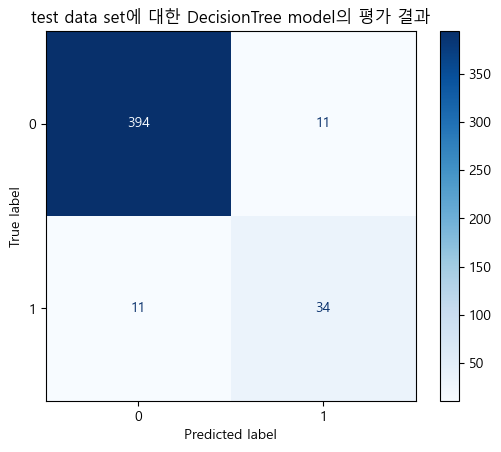

In [39]:
# cnofusion matrix를 만든다.
plot_confusion_matrix(y_test, pred_test_tree, 'test data set에 대한 DecisionTree model의 평가 결과')

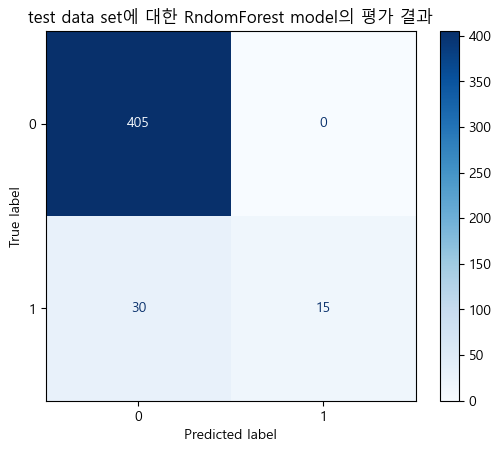

In [40]:
plot_confusion_matrix(y_test, pred_test_rfc, 'test data set에 대한 RndomForest model의 평가 결과')

In [41]:
print('   #####     Decision Tree 검증 결과     #####')
print('='*50)
print_metrics_classification(y_train, pred_train_tree, 'trin data set에 대한 DecisionTree model의 평가 결과')
print('='*50)
print_metrics_classification(y_test, pred_test_tree, 'test data set에 대한 DecisionTree model의 평가 결과')

   #####     Decision Tree 검증 결과     #####
trin data set에 대한 DecisionTree model의 평가 결과
Accuracy: 0.9465478841870824
Recall: 0.8
Precision: 0.7058823529411765
F1-score: 0.7500000000000001
test data set에 대한 DecisionTree model의 평가 결과
Accuracy: 0.9511111111111111
Recall: 0.7555555555555555
Precision: 0.7555555555555555
F1-score: 0.7555555555555555


In [42]:
print('   #####     Random Forest 검증 결과     #####')
print('='*50)
print_metrics_classification(y_train, pred_train_rfc, 'trin data set에 대한 Random Forest model의 평가 결과')
print('='*50)
print_metrics_classification(y_test, pred_test_rfc, 'test data set에 대한 Random Forest model의 평가 결과')

   #####     Random Forest 검증 결과     #####
trin data set에 대한 Random Forest model의 평가 결과
Accuracy: 0.9354120267260579
Recall: 0.35555555555555557
Precision: 1.0
F1-score: 0.5245901639344263
test data set에 대한 Random Forest model의 평가 결과
Accuracy: 0.9333333333333333
Recall: 0.3333333333333333
Precision: 1.0
F1-score: 0.5


## recall과 precision의 관계

**binary classification의 경우 recall이 중요한 경우와 precision이 중요한 경우가 있다.**

### recall이 더 중요한 경우
- model이 실제로는 Positive인 data를 Negative라고 잘못 판단하면 업무상 큰 영향이 있는 경우이다.
- recall을 높이기 위해 FN(False Negative)을 낮추는데 초점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### precision이 더 중요한 경우
- model이 실제로는 Negative인 data를 Positive라고 잘못 판단하면 업무상 큰 영향이 있는 경우이다.
- precision을 높이기 위해 FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

- preprocessing과 modeling을 하고 난 후 model의 성능이 원하는 수준에 도달하지 못했을 때 후처리를 통해 model의 성능을 높일 수 있다.
- 즉 model의 추론 결과를 후에 처리하는 것이다.

## Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

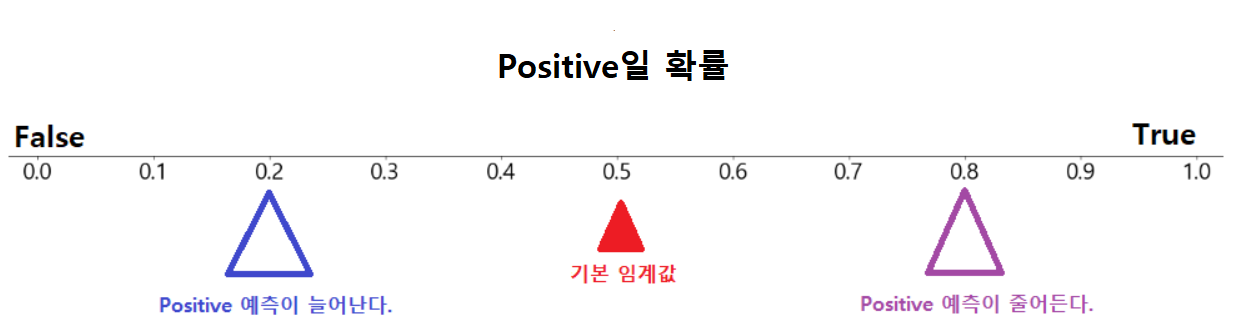

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### threshold 변경에 따른  recall과 precision의 변화 관계
- threshold를 높이면 positive라고 예측하는 기준을 높여서(기준을 엄격히 해서) negative로 예측되는 sample이 많아 진다. 즉 FN이 많아진다. 그래서 precision은 높아지고 recall은 낮아진다.
- threshold를 낮추면 positive라고 예측하는 기준이 낮아져서 positive로 예측되는 sample이 많아 진다. 즉 FP가 많아진다. 그래서 recall은 높아지고 precision는 낮아진다.
- 정리
    - **threshold를 낮추면 recall은 높아지고 precision은 낮아진다.**
    - **threshold를 높이면 recall은 낮아지고 precision은 높아진다.**
- threshold를 변화시켰을 때 **recall과 precision은 반비례 관계를 가진다.**
- threshold를 변화시켰을 때 **recall과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### threshold 변화에 따른 recall, precision 변화

In [43]:
# 위의 내용을 종합하자. classification model이 예측한 확률을 출력해야 하는 것이다.

##### 분류 모델의 추론 메소드
- model.predict(X)
    - model이 X를 예측한 결과를 반환한다. 이때 반환 값은 class이다.
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - model이 X를 예측한 결과를 class별 확률을 반환한다. 즉 model이 결과를 예측하는데 class별로 해당 class가 될 수 있는 확률을 반환하는 것이다.
    - 추론한 X의 class별 확률을 반환

In [44]:
tree.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [45]:
r = tree.predict_proba(X_test[:5])
print(r.shape)
np.round(r, 3)

(5, 2)


array([[0.992, 0.008],
       [0.987, 0.013],
       [0.987, 0.013],
       [0.987, 0.013],
       [0.987, 0.013]])

In [46]:
# 즉 첫 번째 feature에 대해서는 예측 결과가 0이 될 확률이 0.992인 것이고, 1이 될 확률이 0.008인 것이다.
# 다른 경우에 대해서도 마찬가지이다.

In [47]:
# feature에 대한 예측 결과가 positive가 될 수 있는 확률만 출력해보자.
r[:, 1]

array([0.00826446, 0.01304348, 0.01304348, 0.01304348, 0.01304348])

In [48]:
# threshold를 0.01로 낮춰보자.
np.where(r[:, 1] > 0.01, 1, 0)

array([0, 1, 1, 1, 1])

In [49]:
# 처음에는 모든 예측 결과가 0이었다. 하지만 threshold를 0.01로 낮췄더니 처음 값만 0이고 나머지는 1이 되었다.
# 이것이 threshold를 낮춘 것이고, 보이는 바와 같이 positive라고 예측한 것이 많아졌다.
# 그 결과 FP가 많아진다. 그래서 recall은 높아지고 precision는 낮아진다.

##### threshold 변화에 따른 recall / precision 값 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - return value: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [52]:
from sklearn.metrics import precision_recall_curve

# model의 예측 결과가 positive일 수 있는 확률만 추출한다.
pos_proba_test = tree.predict_proba(X_test)[:, 1]

# precision_recall_curve() 함수를 이용해 precision / recall / threshold의 값 변화를 반환한다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test)

precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [73]:
precisions

array([0.1       , 0.10757946, 0.43181818, 0.51388889, 0.56060606,
       0.75555556, 0.82352941, 1.        ])

In [74]:
recalls

array([1.        , 0.97777778, 0.84444444, 0.82222222, 0.82222222,
       0.75555556, 0.62222222, 0.        ])

In [75]:
thresholds

array([0.00826446, 0.01304348, 0.03389831, 0.04      , 0.14925373,
       0.54545455, 0.75      ])

In [54]:
# 즉 threshold 값이 7개 있는 것이고 precision과 recall 값은 8개씩 있는 것이다.
# threshold의 마지막 변화 값은 1보다 크다. 하지만 자동으로 이 값은 제외하고 threshold list를 만들어서 반환한다.
# 그래서 개수의 짝이 맞지 않는 것이다.
# 짝을 맞추기 위해 threshold 배열의 마지막 index에 1을 하나 추가한다.
# thresholds는 ndarray이기 때문에 np.append()를 이용한다.
thresholds = np.append(thresholds, 1)

In [77]:
thresholds

array([0.00826446, 0.01304348, 0.03389831, 0.04      , 0.14925373,
       0.54545455, 0.75      , 1.        ])

In [55]:
# 위 ndarray들을 하나의 DataFrame으로 만든다.
import pandas as pd

prc_df = pd.DataFrame({
    'Threshold': thresholds,
    'Recall': recalls,
    'Precision': precisions
})

prc_df

,Threshold,Recall,Precision
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


In [ ]:
# threshold가 커지면서 recall은 낮아지고 precision은 높아지는 것을 한 눈에 확인할 수 있다.

###### plotting

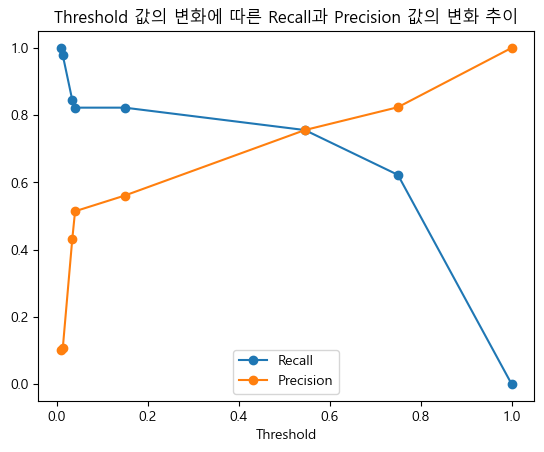

In [56]:
# 위 data를 plotting 해보자.

prc_df.set_index('Threshold').plot(marker = 'o')

plt.title('Threshold 값의 변화에 따른 Recall과 Precision 값의 변화 추이')

plt.show()

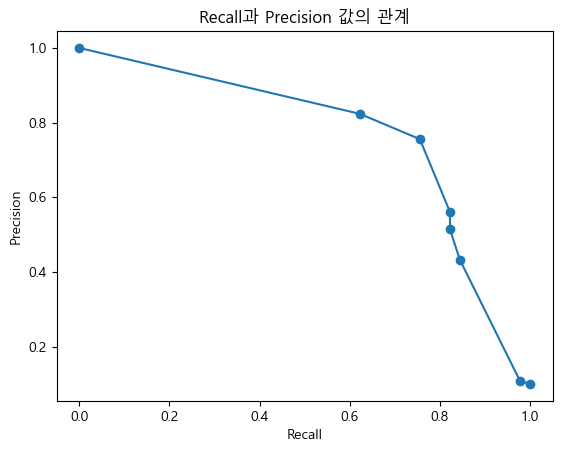

In [57]:
plt.plot(prc_df['Recall'], prc_df['Precision'], marker = 'o')

plt.title('Recall과 Precision 값의 관계')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

In [ ]:
# recall과 precision은 반비례 관계이다. 위 그래프를 응용한 것이 아래에서 배울 PR Curve(Precision Recall Curve)이다.

### threshold를 변경하는 post-processing을 통한 recall / precision 변경 

##### 모델 예측 결과에 적용

In [ ]:
# # test data set을 이용
# model이 positive라고 예측한 확률에 대해 threshold를 변경하면서 recall / precision 값을 변경시켜보자.

# threshold의 기본값은 0.5이다. 0.5일 때 각 evaluation index의 값을 확인해보자.

In [58]:
pos_test_tree = tree.predict_proba(X_test)[:, 1]

pred_test_tree = np.where(pos_test_tree > 0.5, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title = 'Threshold: 0.5')

Threshold: 0.5
Accuracy: 0.9511111111111111
Recall: 0.7555555555555555
Precision: 0.7555555555555555
F1-score: 0.7555555555555555


In [ ]:
# threshold를 변경할 때는
# 위에서 했던 것처럼 그래프를 그리거나 DataFrame을 생성해 적절한 threshold 값을 판단하고 이를 설정해야 한다.

In [85]:
# test data set을 이용
# model이 positive라고 예측한 확률에 대해 threshold를 변경하면서 recall / precision 값을 변경시켜보자.

pos_test_tree = tree.predict_proba(X_test)[:, 1]

# recall을 높여보자. threshold를 0.1로 낮춘다.
pred_test_tree = np.where(pos_test_tree > 0.1, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title = 'Threshold: 0.1')

Threshold: 0.1
Accuracy: 0.9177777777777778
Recall: 0.8222222222222222
Precision: 0.5606060606060606
F1-score: 0.6666666666666666


In [59]:
# precision을 높여보자. threshold를 0.6으로 올린다.
pos_test_tree = tree.predict_proba(X_test)[:, 1]

pred_test_tree = np.where(pos_test_tree > 0.6, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title = 'Threshold: 0.6')

Threshold: 0.6
Accuracy: 0.9488888888888889
Recall: 0.6222222222222222
Precision: 0.8235294117647058
F1-score: 0.7088607594936709


In [ ]:
# F1-score는 recall과 precision의 조화 평균이다. 그래서 두 값이 비슷할 때 그 값이 가장 크다.

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- Positive 확률 0~1사이의 모든 threhold에 대하여 recall과 precision의 변화를 이용한 평가 지표
- X축에 recall, Y축에 precision를 놓고 threshold가 1에서부터 0까지 변화할 때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한 것이다.
    - PR Curve의 선아래 면적을 계산한 값으로 이 값이 높을수록 model의 성능이 우수한 것이다.
        - recall과 precision이 모두 0 ~ 1의 값을 가지므로 이들을 이용한 AP score 역시 0 ~ 1의 값을 가진다. 그래서 하나의 evaluation index로 사용할 수 있는 것이다.
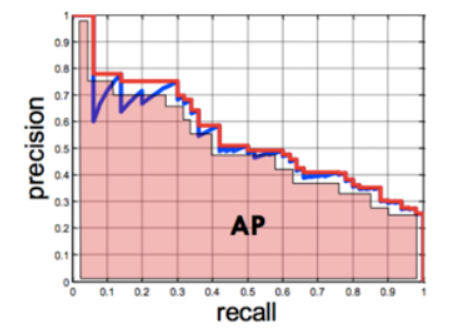   

In [ ]:
# PR curve를 그릴 때는 그래프를 계단 형태로 그려야 한다. 즉 점을 연결할 때 직선이 아니라 계단식으로 그려야 하는 것이다.
# 이는 AP score를 계산할 때 편하게 하기 위함이다.
# 계단 형태 그래프를 그려주는 class는 scikit-learn의 PrecisionRecallDisplay이다.
# AP score를 계산해주는 함수는 average_precision_score()이다.

# 아래의 순서를 따라 PR curve를 그리고 AP score를 계산해보자.

In [65]:
# 필요한 것을 import 한다.
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

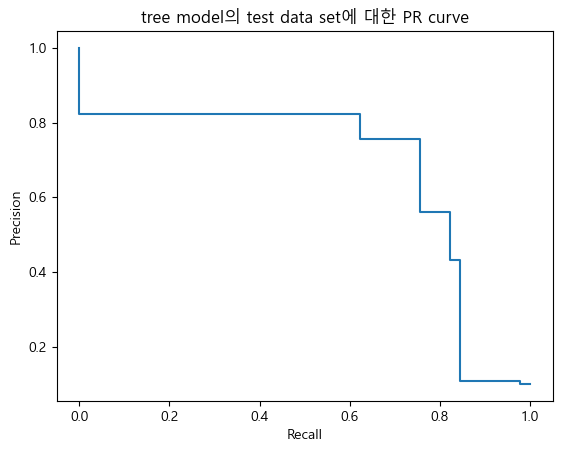

0.6766948888666132


In [66]:
# 위에서 생성한 tree model과 randomforest model에 대해서 그래프를 그린다.
# 먼저 tree model의 test data set에 대한 PR curve를 그려보자.

# 이를 위해 model이 예측한 label이 positive일 확률을 생성한다.
test_proba_tree = tree.predict_proba(X_test)[:, 1]

# 그래프를 그릴 때 꼭 필요한 것은 threshold가 변할 때 recall과 precision이 변하는 값이다.
# 즉 precision_recall_curve 값이 꼭 필요한 것이다.
# 각 model에 대해 이 세 값의 관계 정보를 가지고 있는 data를 생성한다.
precision_tree, recall_tree, threshold_tree = precision_recall_curve(y_test, test_proba_tree)

# 위의 것들을 종합해 tree model에 대한 PrecisionRecallDisplay instance를 생성한다.
disp_tree = PrecisionRecallDisplay(precision_tree, recall_tree)

# 위 instance를 이용해 그래프를 그린다.
disp_tree.plot()
plt.title('tree model의 test data set에 대한 PR curve')
plt.show()

# AP score를 계산한다. average_precision_score() 함수에도 실제 값과 model이 예측한 값이 positive일 확률을 입력한다.
ap_score_tree = average_precision_score(y_test, test_proba_tree)
print(ap_score_tree)

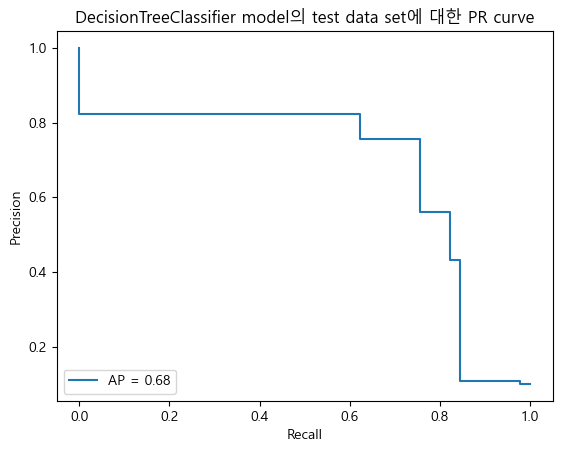

In [72]:
# PrecisionRecallDisplay instance를 생성할 때 AP score를 입력할 수 있다.
# 이는 parameter average_precision을 사용하고 계산한 AP score를 값으로 준다.
# 이렇게 생성한 instance로 그래프를 그리면 legend로 AP score 값을 알려준다.
disp_tree = PrecisionRecallDisplay(precision_tree, recall_tree, average_precision = ap_score_tree)

disp_tree.plot()
plt.title('DecisionTreeClassifier model의 test data set에 대한 PR curve')
plt.show()

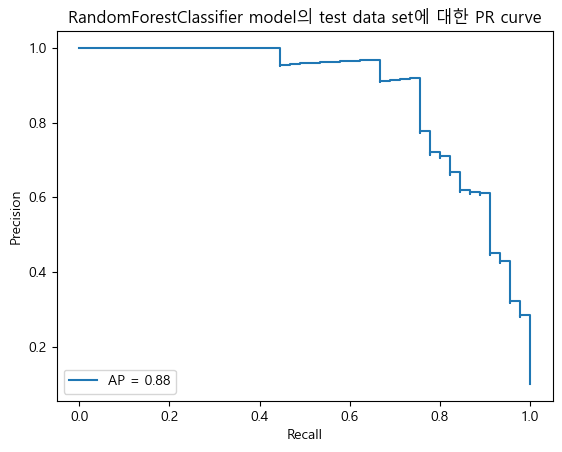

In [73]:
# 이번에는 randomforest model의 test data set에 대한 PR curve를 그려보자.

# positive일 확률 추출
test_proba_rfc = rfc.predict_proba(X_test)[:, 1]

# precision_recall_curve 생성
precision_rfc, recall_rfc, threshold_rfc = precision_recall_curve(y_test, test_proba_rfc)

# AP score 계산
ap_score_rfc = average_precision_score(y_test, test_proba_rfc)

# PrecisionRecallDisplay instance 생성
disp_rfc = PrecisionRecallDisplay(precision_rfc, recall_rfc, average_precision = ap_score_rfc)

# PrecisionRecallDisplay instance를 이용한 그래프 생성
disp_rfc.plot()
plt.title('RandomForestClassifier model의 test data set에 대한 PR curve')
plt.show()

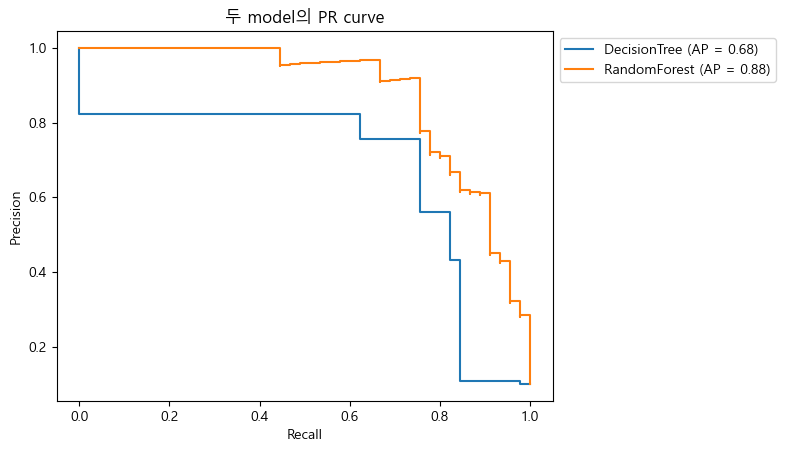

In [81]:
# 두 model의 PR curve를 한번에 비교하기 위해 하나의 axes에 두 그래프를 같이 그려보자.

# axes를 추출한다.
axes = plt.gca()

# 각 model의 PrecisionRecallDisplay instance를 생성한다.
# 이때 parameter estimator_name를 설정한다. 이는 model의 legend naem을 설정할 수 있게 해준다.
disp_tree = PrecisionRecallDisplay(precision_tree, recall_tree, 
                                   average_precision = ap_score_tree, 
                                   estimator_name = 'DecisionTree')
disp_rfc = PrecisionRecallDisplay(precision_rfc, recall_rfc, 
                                  average_precision = ap_score_rfc, 
                                  estimator_name = 'RandomForest')

# 그래프를 그릴 axes를 직접 지정한다.
disp_tree.plot(ax = axes)
disp_rfc.plot(ax = axes)

plt.title('두 model의 PR curve')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

In [ ]:
# threshold 값이 변해도 RandomForest model은 DecisionTree model보다 precision 값이 크게 떨어지지 않는다.
# RandomFrest model이 DecisionTree model보다 positive에 대한 성능이 좋다고 판단할 수 있다.

# AP score는 positive에 대한 예측력만을 확인하는 것이다. 즉 AP score가 높다는 뜻은 model이 positive를 잘 예측한다는 것이다.
# recall과 precision에 대한 model의 성능을 보기 위해 AP score를 확인한다.

# 이거 잘 모르겠음. 다시 정리하기.

In [ ]:
# recall과 fall-out은 비례 관계이다.

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    - 낮을수록 model의 성능이 좋은 것이다.
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    - 높을수록 model의 성능이 좋은 것이다.
    $$
    \frac{TP}{FN+TP}
    $$

- **ROC Curve**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - FPR과 TPR의 변화는 비례해서 변화한다.
        - 낮은 임계값에서 큰 임계값으로 변경하면 높은 값에서 낮은 값으로 같이 변화한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

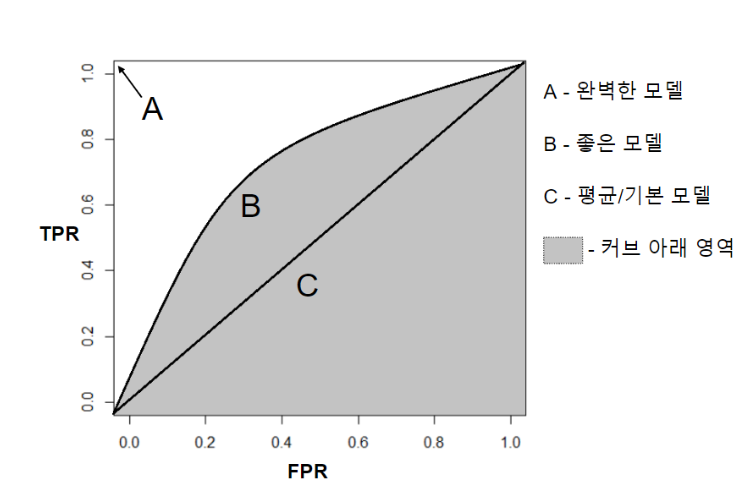

- 가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
- 일반적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.
- 그래프가 A에 가까워질수록 positive에 대한 예측력과 negative에 대한 예측력이 모두 좋은 것이다.
- 즉 이 그래프를 통해 model의 positive와 negative에 대한 예측력을 한번에 확인할 수 있는 것이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

## ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [85]:
# ROC curve를 그려보자. roc_curve와
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

In [86]:
# tree model

# threshold 변화에 따른 FPR과 TPR 값들을 조회해보자. - roc_curve() 사용
FPR_tree, TPR_tree, threshold_tree = roc_curve(y_test, test_proba_tree)

In [87]:
# randomforest model

FPR_rfc, TPR_rfc, threshold_rfc = roc_curve(y_test, test_proba_rfc)

In [88]:
# DataFrame으로 생성
pd.DataFrame({'Threshold': threshold_tree, 'FPR': FPR_tree, 'TPR': TPR_tree})

,Threshold,FPR,TPR
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


In [89]:
pd.DataFrame({'Threshold': threshold_rfc, 'FPR': FPR_rfc, 'TPR': TPR_rfc})

,Threshold,FPR,TPR
0,1.644297,0.000000,0.000000
1,0.644297,0.000000,0.022222
2,0.453446,0.000000,0.444444
3,0.447451,0.002469,0.444444
4,0.327547,0.002469,0.666667
5,0.321028,0.007407,0.666667
6,0.282455,0.007407,0.755556
7,0.240723,0.024691,0.755556
8,0.238526,0.024691,0.777778
9,0.217295,0.034568,0.777778


In [92]:
# AUC score를 계산하자.
# roc_auc_score() 함수를 이용한다.
roc_auc_tree = roc_auc_score(y_test, test_proba_tree)

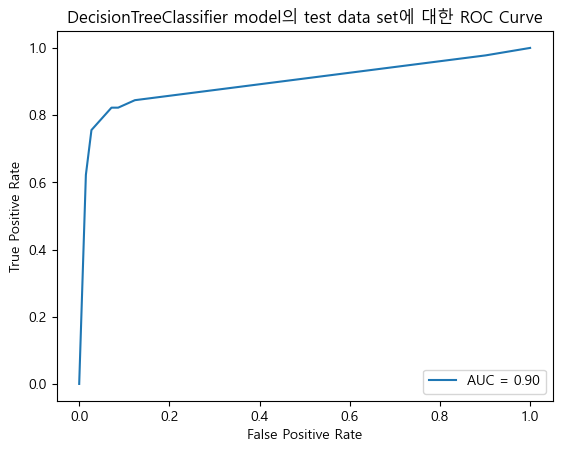

In [97]:
# tree model의 ROC curve를 그려보자.

# RocCurveDisplay instance를 생성한다.
disp_roc_tree = RocCurveDisplay(fpr = FPR_tree, tpr = TPR_tree, roc_auc = roc_auc_tree)

disp_roc_tree.plot()
plt.title('DecisionTreeClassifier model의 test data set에 대한 ROC Curve')
plt.show()

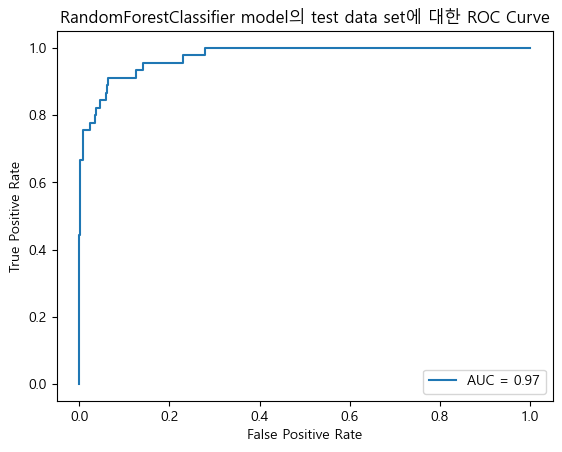

In [96]:
# RandomForest model 확인
roc_auc_rfc = roc_auc_score(y_test, test_proba_rfc)

disp_roc_rfc = RocCurveDisplay(fpr = FPR_rfc, tpr = TPR_rfc, roc_auc = roc_auc_rfc)

disp_roc_rfc.plot()
plt.title('RandomForestClassifier model의 test data set에 대한 ROC Curve')
plt.show()

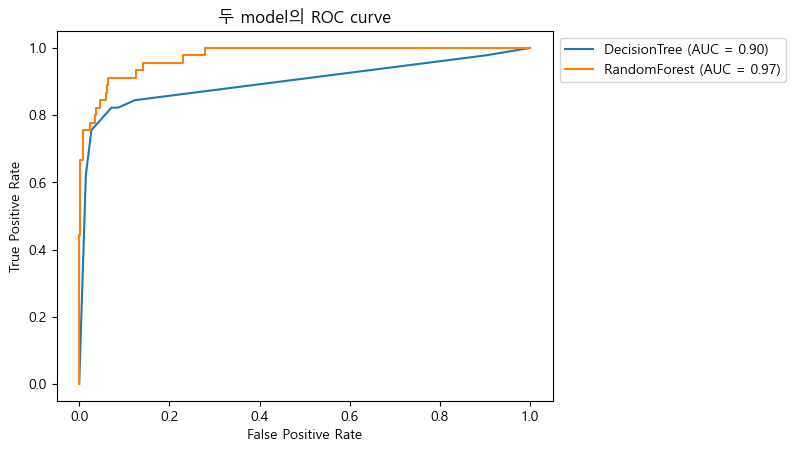

In [100]:
# 위 그래프를 하나의 axes에 그려본다.

axes = plt.gca()

disp_roc_tree = RocCurveDisplay(fpr = FPR_tree, tpr = TPR_tree, 
                                roc_auc = roc_auc_tree, 
                                estimator_name = 'DecisionTree')
disp_roc_rfc = RocCurveDisplay(fpr = FPR_rfc, tpr = TPR_rfc, 
                               roc_auc = roc_auc_rfc, 
                               estimator_name = 'RandomForest')

disp_roc_tree.plot(ax = axes)
disp_roc_rfc.plot(ax = axes)

plt.title('두 model의 ROC curve')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [155]:
# 필요한 class와 함수를 import한다.

# data set 관련
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# model 관련
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# evaluation index 관련
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# confusion matrix 관련
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# PR curve 관련
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

# ROC curve 관련
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# pyplot 관련
import matplotlib.pyplot as plt

In [104]:
# data set을 생성한다.

data = load_breast_cancer()
X = data.data
y = data.target

In [105]:
# data set separation을 실행한다.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    stratify = y, 
                                                    random_state = 0)

In [ ]:
# modeling을 진행한다.

##### DecisionTreeClassifier에 대해서

In [160]:
# DecisionTreeClassifier modeling
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [168]:
# tree model의 예측 결과 생성
pred_test_tree = tree.predict(X_test)

In [167]:
# evaluation index 계산
acc_test_tree = accuracy_score(y_test, pred_test_tree)
rec_test_tree = recall_score(y_test, pred_test_tree)
pre_test_tree = precision_score(y_test, pred_test_tree)
f1_test_tree = f1_score(y_test, pred_test_tree)

# evaluation index 출력
print(f'Accuracy: {acc_test_tree}')
print(f'Recall: {rec_test_tree}')
print(f'Precision: {pre_test_tree}')
print(f'F1-Score: {f1_test_tree}')

Accuracy: 0.9210526315789473
Recall: 0.9305555555555556
Precision: 0.9436619718309859
F1-Score: 0.9370629370629372


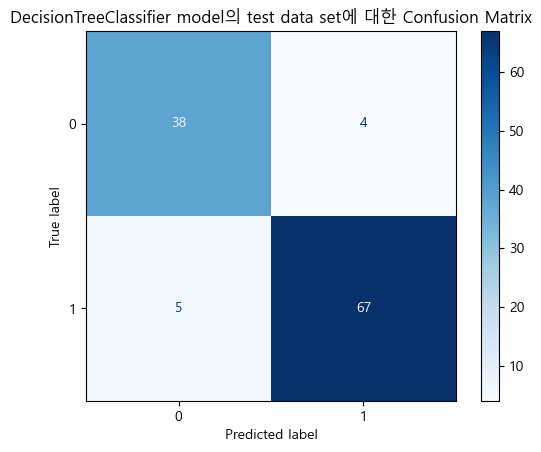

In [166]:
# confusion matrix 생성
cm_tree = confusion_matrix(y_test, pred_test_tree)
disp_cm_tree = ConfusionMatrixDisplay(cm_tree)

# confusion matrix 출력
disp_cm_tree.plot(cmap = 'Blues')
plt.title('DecisionTreeClassifier model의 test data set에 대한 Confusion Matrix')
plt.show()

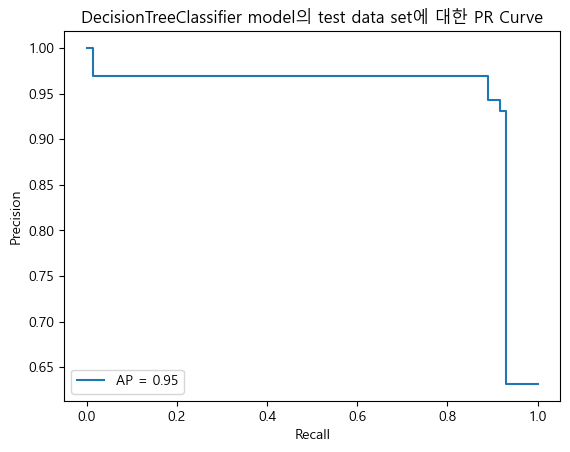

In [128]:
# PR curve 생성

# positive일 확률 추출
test_proba_tree = tree.predict_proba(X_test)[:, 1]

# threshold 변화에 따른 precsion / recall 값의 변화 생성
precision_tree, recall_tree, threshold_tree = precision_recall_curve(y_test, test_proba_tree)

# AP score 계산
ap_score_tree = average_precision_score(y_test, test_proba_tree)

# PrecisionRecallDisplay instance 생성
disp_pr_tree = PrecisionRecallDisplay(precision_tree, recall_tree, average_precision = ap_score_tree)

# 그래프 생성
disp_pr_tree.plot()
plt.title('DecisionTreeClassifier model의 test data set에 대한 PR Curve')
plt.show()

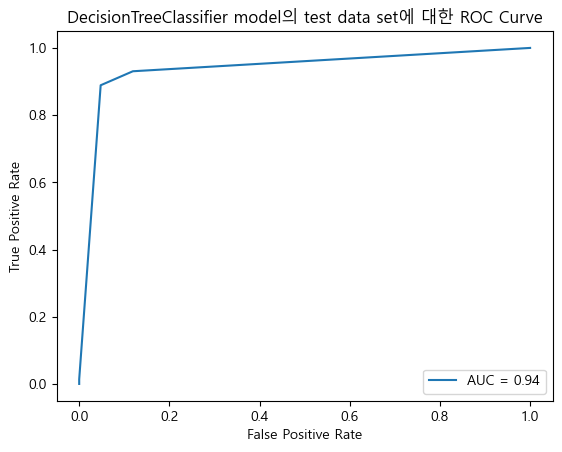

In [127]:
# ROC curve 생성

# positive일 확률 추출
test_proba_tree = tree.predict_proba(X_test)[:, 1]

# threshold 변화에 따른 FPR / TPR 변화 생성
FPR_tree, TPR_tree, threshold_tree = roc_curve(y_test, test_proba_tree)

# AUC score 계산
roc_auc_tree = roc_auc_score(y_test, test_proba_tree)

# RocCurveDisplay instance 생성
disp_roc_tree = RocCurveDisplay(fpr = FPR_tree, tpr = TPR_tree, roc_auc = roc_auc_tree)

# 그래프 생성
disp_roc_tree.plot()
plt.title('DecisionTreeClassifier model의 test data set에 대한 ROC Curve')
plt.show()

##### RandomForestClassifier에 대해서

In [169]:
# RandomForestClassifier modeling
rfc = RandomForestClassifier(max_depth=2, n_estimators=200, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [170]:
# rfc model의 예측 결과 생성
pred_test_rfc = rfc.predict(X_test)

In [171]:
# evaluation index 계산
acc_test_rfc = accuracy_score(y_test, pred_test_rfc)
rec_test_rfc = recall_score(y_test, pred_test_rfc)
pre_test_rfc = precision_score(y_test, pred_test_rfc)
f1_test_rfc = f1_score(y_test, pred_test_rfc)

# evaluation index 출력
print(f'Accuracy: {acc_test_rfc}')
print(f'Recall: {rec_test_rfc}')
print(f'Precision: {pre_test_rfc}')
print(f'F1-Score: {f1_test_rfc}')

Accuracy: 0.9385964912280702
Recall: 0.9444444444444444
Precision: 0.9577464788732394
F1-Score: 0.951048951048951


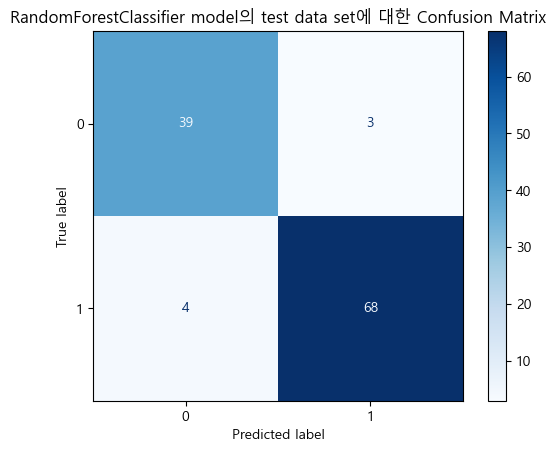

In [172]:
# confusion matrix 생성
cm_rfc = confusion_matrix(y_test, pred_test_rfc)
disp_cm_rfc = ConfusionMatrixDisplay(cm_rfc)

# confusion matrix 출력
disp_cm_rfc.plot(cmap = 'Blues')
plt.title('RandomForestClassifier model의 test data set에 대한 Confusion Matrix')
plt.show()

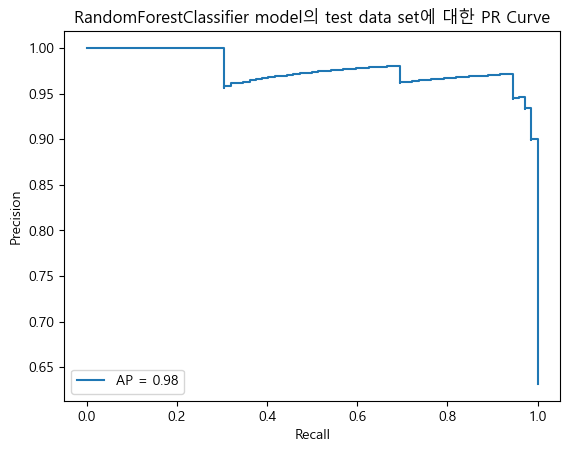

In [176]:
# PR curve 생성

# positive일 확률 추출
test_proba_rfc = rfc.predict_proba(X_test)[:, 1]

# threshold 변화에 따른 precsion / recall 값의 변화 생성
precision_rfc, recall_rfc, threshold_rfc = precision_recall_curve(y_test, test_proba_rfc)

# AP score 계산
ap_score_rfc = average_precision_score(y_test, test_proba_rfc)

# PrecisionRecallDisplay instance 생성
disp_pr_rfc = PrecisionRecallDisplay(precision_rfc, recall_rfc, average_precision = ap_score_rfc)

# 그래프 생성
disp_pr_rfc.plot()
plt.title('RandomForestClassifier model의 test data set에 대한 PR Curve')
plt.show()

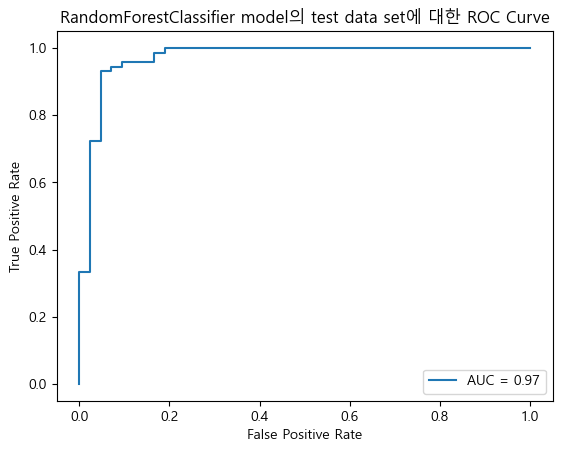

In [136]:
# ROC curve 생성

# positive일 확률 추출
test_proba_rfc = rfc.predict_proba(X_test)[:, 1]

# threshold 변화에 따른 FPR / TPR 변화 생성
FPR_rfc, TPR_rfc, threshold_rfc = roc_curve(y_test, test_proba_rfc)

# AUC score 계산
roc_auc_rfc = roc_auc_score(y_test, test_proba_rfc)

# RocCurveDisplay instance 생성
disp_roc_rfc = RocCurveDisplay(fpr = FPR_rfc, tpr = TPR_rfc, roc_auc = roc_auc_rfc)

# 그래프 생성
disp_roc_rfc.plot()
plt.title('RandomForestClassifier model의 test data set에 대한 ROC Curve')
plt.show()

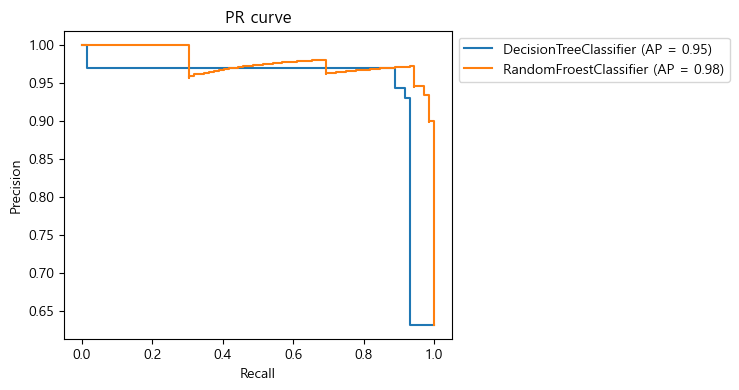

In [180]:
# 두 그래프를 한 번에 그려본다.

disp_pr_tree = PrecisionRecallDisplay(precision_tree, recall_tree, 
                                      average_precision = ap_score_tree, 
                                      estimator_name = 'DecisionTreeClassifier')
disp_pr_rfc = PrecisionRecallDisplay(precision_rfc, recall_rfc, 
                                     average_precision = ap_score_rfc, 
                                     estimator_name = 'RandomFroestClassifier')

plt.figure(figsize = (5, 4))
axes = plt.gca()

disp_pr_tree.plot(ax = axes)
disp_pr_rfc.plot(ax = axes)

plt.title('PR curve')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

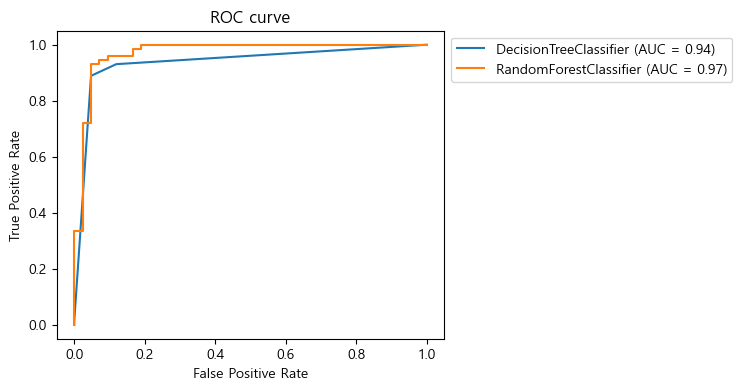

In [181]:
disp_roc_tree = RocCurveDisplay(fpr = FPR_tree, tpr = TPR_tree, 
                                roc_auc = roc_auc_tree, 
                                estimator_name = 'DecisionTreeClassifier')
disp_roc_rfc = RocCurveDisplay(fpr = FPR_rfc, tpr = TPR_rfc, 
                               roc_auc = roc_auc_rfc, 
                               estimator_name = 'RandomForestClassifier')

plt.figure(figsize = (5, 4))
axes = plt.gca()

disp_roc_tree.plot(ax = axes)
disp_roc_rfc.plot(ax = axes)

plt.title('ROC curve')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

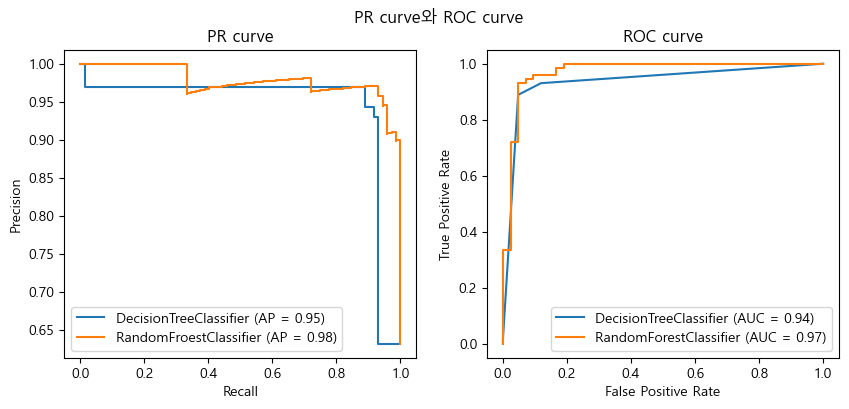

In [154]:
disp_pr_tree = PrecisionRecallDisplay(precision_tree, recall_tree, 
                                      average_precision = ap_score_tree, 
                                      estimator_name = 'DecisionTreeClassifier')
disp_pr_rfc = PrecisionRecallDisplay(precision_rfc, recall_rfc, 
                                     average_precision = ap_score_rfc, 
                                     estimator_name = 'RandomFroestClassifier')

disp_roc_tree = RocCurveDisplay(fpr = FPR_tree, tpr = TPR_tree, 
                                roc_auc = roc_auc_tree, 
                                estimator_name = 'DecisionTreeClassifier')
disp_roc_rfc = RocCurveDisplay(fpr = FPR_rfc, tpr = TPR_rfc, 
                               roc_auc = roc_auc_rfc, 
                               estimator_name = 'RandomForestClassifier')

plt.figure(figsize = (10, 4))
plt.suptitle('PR curve와 ROC curve')

plt.subplot(1, 2, 1)
ax1 = plt.gca()
disp_pr_tree.plot(ax = ax1)
disp_pr_rfc.plot(ax = ax1)
plt.title('PR curve')

plt.subplot(1, 2, 2)
ax2 = plt.gca()
disp_roc_tree.plot(ax = ax2)
disp_roc_rfc.plot(ax = ax2)
plt.title('ROC curve')

plt.show()